In [21]:
import pandas as pd
import numpy as np

data = pd.read_csv('zgpa_train.csv')
data.head()

,date,open,high,low,close,volume
0,2016-01-04,30.57,30.57,28.63,28.78,70997200
1,2016-01-05,28.41,29.54,28.23,29.23,87498504
2,2016-01-06,29.03,29.39,28.73,29.26,48012112
3,2016-01-07,28.73,29.25,27.73,28.50,23647604
4,2016-01-08,28.73,29.18,27.63,28.67,98239664


In [22]:
price = data.loc[:, 'close']
price.head()

0    28.78
1    29.23
2    29.26
3    28.50
4    28.67
Name: close, dtype: float64

In [23]:
price_norm = price / price.max()
price_norm.head()

0    0.383273
1    0.389266
2    0.389666
3    0.379545
4    0.381808
Name: close, dtype: float64

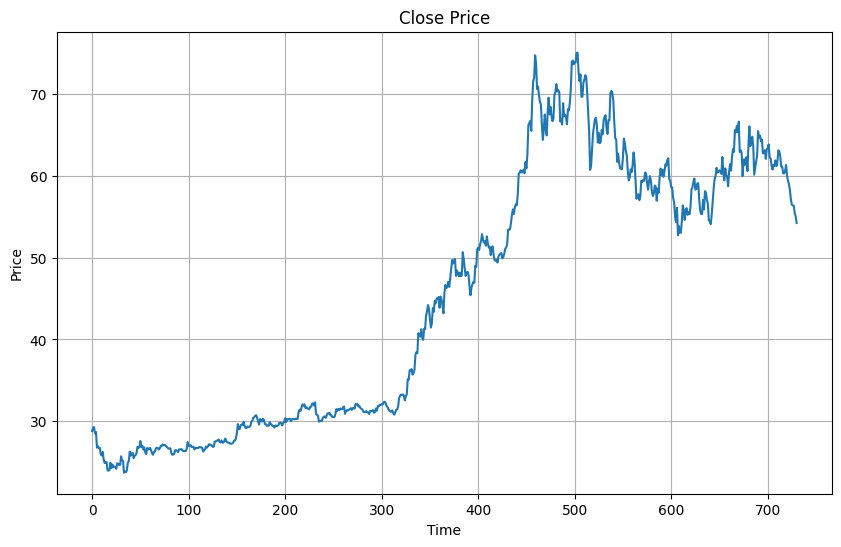

In [24]:
from matplotlib import pyplot as plt

fig1 = plt.figure(figsize=(10, 6))
plt.plot(price)
plt.title('Close Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.grid()
plt.show()

In [29]:
def extract_data(data, time_step):
    x, y = [], []
    for i in range(len(data) - time_step):
        x.append([a for a in data[i:i + time_step]])
        y.append(data[i + time_step])
    x = np.array(x)
    x = x.reshape(x.shape[0], x.shape[1], 1)
    y = np.array(y)
    return x, y


In [30]:
time_step = 8

x, y = extract_data(price_norm, time_step)
print(x.shape)

(723, 8, 1)


In [33]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Input

model = Sequential()
model.add(Input(shape=(time_step, 1)))
model.add(SimpleRNN(units=5, activation='relu'))
model.add(Dense(units=1, activation='linear'))
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_4 (SimpleRNN)        │ (None, 5)              │            35 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41 (164.00 B)

 Trainable params: 41 (164.00 B)

 Non-trainable params: 0 (0.00 B)

In [34]:
model.fit(x, y, epochs=100, batch_size=30)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0742 - mae: 0.2428
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0026 - mae: 0.0439
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0018 - mae: 0.0378
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0014 - mae: 0.0331
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0012 - mae: 0.0302
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.4389e-04 - mae: 0.0270
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.1093e-04 - mae: 0.0232
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.0822e-04 - mae: 0.0193 
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.2630e-04 - mae: 0.0175
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.9024e-04 - mae: 0.0165
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.0625e-04 - mae: 0.0142
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.5254e-04 - mae: 0.0129
Epoch 13

In [35]:
y_train_predict = model.predict(x) * price.max()
y_train = y * price.max()

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


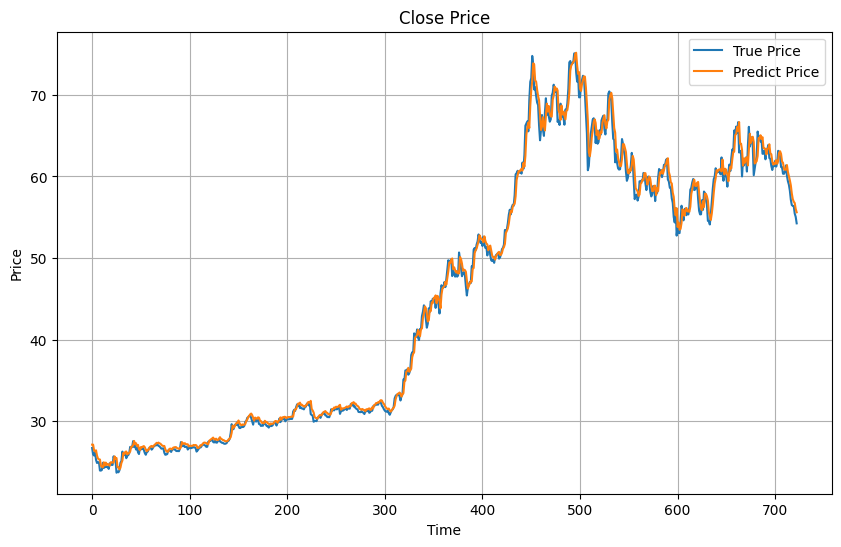

In [37]:
fig2 = plt.figure(figsize=(10, 6))
plt.plot(y_train, label='True Price')
plt.plot(y_train_predict, label='Predict Price')
plt.title('Close Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

In [39]:
data_test = pd.read_csv('zgpa_test.csv')
price_test = data_test.loc[:, 'close']
price_test_norm = price_test / price.max()
x_test_norm, y_test_norm = extract_data(price_test_norm, time_step)
print(x_test_norm.shape, len(y_test_norm))

(174, 8, 1) 174


In [40]:
y_test_predict = model.predict(x_test_norm) * price.max()
y_test = y_test_norm * price.max()

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


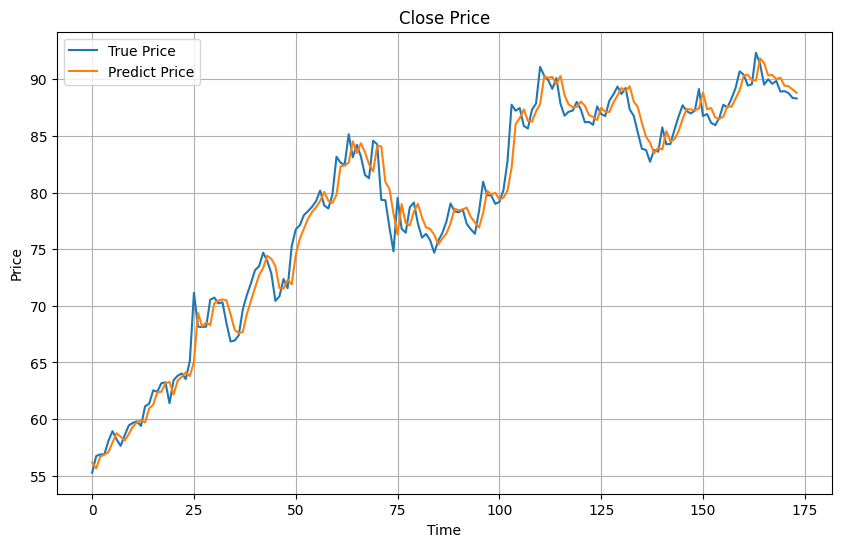

In [41]:
fig3 = plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True Price')
plt.plot(y_test_predict, label='Predict Price')
plt.title('Close Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

In [42]:
result_y_test = y_test.reshape(-1, 1)
result_y_test_predict = y_test_predict
print(result_y_test.shape, result_y_test_predict.shape)

(174, 1) (174, 1)


In [43]:
result = np.concatenate((result_y_test, result_y_test_predict), axis=1)
print(result.shape)

(174, 2)


In [46]:
result = pd.DataFrame(result, columns=['True Price', 'Predict Price'])
result.to_csv('zgpa_test_predict.csv', index=False)